In [1]:
# importing Dependencies 
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce
from scipy.stats import linregress

In [2]:
# importing csv for internal combusion engine cars to create dataframe
ice_df=pd.read_csv("Resources/Edmunds.csv")
#displaying 1st 5 rows of internal combusiton engine cars dataframe
display(ice_df.head())
# importing csv for hybrid carsto create dataframe
hybrid_df=pd.read_csv("Resources/Edmunds_hybrid.csv")
#displaying 1st 5 rows of hybrid cars dataframe
display(hybrid_df.head())
# importing csv for electric cars to create dataframe
ev_df=pd.read_csv("Resources/Edmunds_ev.csv")
#displaying 1st 5 rows of electric cars dataframe
display(ev_df.head())

,info,year 1,year 2,year 3,year 4,year 5,model year,model,engine,cost
0,Insurance,1544,1598,1654,1712,1772,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
1,Maintenance,86,440,386,2465,2049,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
2,Repairs,0,0,0,462,707,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
3,Taxes_Fees,3347,239,214,194,194,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096
4,Financing,4197,3421,2566,1628,597,2023,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096


,info,year 1,year 2,year 3,year 4,year 5,model year,model,engine,cost
0,Insurance,1452,1503,1555,1610,1666,2023,Audi A3 Premium 4dr Sedan AWD w/40 TFSI,2.0L 4cyl Turbo gas/electric mild hybrid 7AM,39413
1,Maintenance,273,953,904,2173,1183,2023,Audi A3 Premium 4dr Sedan AWD w/40 TFSI,2.0L 4cyl Turbo gas/electric mild hybrid 7AM,39413
2,Repairs,0,0,0,858,1310,2023,Audi A3 Premium 4dr Sedan AWD w/40 TFSI,2.0L 4cyl Turbo gas/electric mild hybrid 7AM,39413
3,Taxes_Fees,2646,188,169,153,153,2023,Audi A3 Premium 4dr Sedan AWD w/40 TFSI,2.0L 4cyl Turbo gas/electric mild hybrid 7AM,39413
4,Financing,3117,2541,1906,1209,443,2023,Audi A3 Premium 4dr Sedan AWD w/40 TFSI,2.0L 4cyl Turbo gas/electric mild hybrid 7AM,39413


,info,year 1,year 2,year 3,year 4,year 5,model year,model,engine,cost
0,Insurance,1763,1825,1889,1955,2023,2023,Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473
1,Maintenance,185,772,413,3544,1690,2023,Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473
2,Repairs,0,0,0,801,1223,2023,Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473
3,Taxes_Fees,5574,398,356,323,323,2023,Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473
4,Financing,6998,5703,4279,2714,994,2023,Audi e-tron Chronos Edition 4dr SUV AWD,electric DD,88473


In [3]:
#addingin column with type for easier sorting
ice_df['type']='internal combustion'
hybrid_df['type']='hybrid'
ev_df['type']='electric'

In [46]:
#distribution of the range of cost for the cars in the data frames based on engine type
display(f'cost of internal combustion engine cars: max = ${ice_df["cost"].max()}, min=${ice_df["cost"].min()}, mean=${round(ice_df["cost"].mean(),2)}')
display(f'cost of hybrid cars: max = ${hybrid_df["cost"].max()}, min=${hybrid_df["cost"].min()}, mean=${round(hybrid_df["cost"].mean(),2)}')
display(f'cost of all electric cars: max = ${ev_df["cost"].max()}, min=${ev_df["cost"].min()}, mean=${round(ev_df["cost"].mean(),2)}')

'cost of internal combustion engine cars: max = $272287, min=$25998, mean=$64502.81'

'cost of hybrid cars: max = $147655, min=$13489, mean=$63047.19'

'cost of all electric cars: max = $112924, min=$30119, mean=$61693.39'

In [5]:
# limiting price range of cars for all the engine types for more accurate comparison
# the highest least expensive price for the 3 dataframes
least=26000
# lowest most expensive price for the 3 dataframes
most=113000
# removing most and least expensive cars from analysis for a more fair comparison
reduced_ice_df = ice_df[(ice_df["cost"]>least) & (ice_df["cost"]<most)]
reduced_hybrid_df = hybrid_df[(hybrid_df["cost"]>least) & (hybrid_df["cost"]<most)]
reduced_ev_df = ev_df[(ev_df["cost"]>least)& (ev_df["cost"]<most)]
# concatinating data frames of different engine types into a single dataframe
ice_hybrid_ev_df=pd.concat((reduced_ice_df, reduced_hybrid_df, reduced_ev_df))
# displaying 1st 5 rows of combined dataframe
ice_hybrid_ev_df.tail()

,info,year 1,year 2,year 3,year 4,year 5,model year,model,engine,cost,type
338,Repairs,0,0,0,357,545,2023,Volkswagen ID.4 Standard 4dr SUV,electric DD,39993,electric
339,Taxes_Fees,2525,180,161,146,146,2023,Volkswagen ID.4 Standard 4dr SUV,electric DD,39993,electric
340,Financing,3163,2578,1934,1227,450,2023,Volkswagen ID.4 Standard 4dr SUV,electric DD,39993,electric
341,Depreciation,14139,1969,1865,2187,2072,2023,Volkswagen ID.4 Standard 4dr SUV,electric DD,39993,electric
342,Fuel,874,900,927,955,983,2023,Volkswagen ID.4 Standard 4dr SUV,electric DD,39993,electric


the following code is written to calculate how much it cost for the seven breakdown items from the Edmunds database assuming that a typical person drives 15,000 miles.

In [47]:
# calculating the cost per mile 
for i in range(5):
    # creating search string
    text = "year "+ str(i+1)
    # calculating cost/ 15,000 miles for each break down cost item, model and engine type
    ice_hybrid_ev_df['cost/mile ('+text+ ')']=round(ice_hybrid_ev_df[text]/15000,2)
# displaying 1st 5 rows of df to verify addition
ice_hybrid_ev_df.head()

,model,engine,cost,year 1,year 2,year 3,year 4,year 5,model year,type,cost/mile (year 1),cost/mile (year 2),cost/mile (year 3),cost/mile (year 4),cost/mile (year 5)
info,,,,,,,,,,,,,,,
Insurance,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,1544,1598,1654,1712,1772,2023,internal combustion,0.10,0.11,0.11,0.11,0.12
Maintenance,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,86,440,386,2465,2049,2023,internal combustion,0.01,0.03,0.03,0.16,0.14
Repairs,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,0,0,0,462,707,2023,internal combustion,0.00,0.00,0.00,0.03,0.05
Taxes_Fees,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,3347,239,214,194,194,2023,internal combustion,0.22,0.02,0.01,0.01,0.01
Financing,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,4197,3421,2566,1628,597,2023,internal combustion,0.28,0.23,0.17,0.11,0.04


In [8]:
# creating dataframe to pull out the cost/mile and dropping the yearly cost
yearly_cost=ice_hybrid_ev_df[["model",'engine','cost','type','info','cost/mile (year 1)','cost/mile (year 2)',
                             'cost/mile (year 3)','cost/mile (year 4)','cost/mile (year 5)']]
# setting index to model, engine and cost
yearly_cost.set_index(["model",'engine','cost'], inplace=True)

In [48]:
# calculating the mean based on the engine type and break down cost items
yearly_cost_avg=round(yearly_cost.groupby(['info','type']).mean(numeric_only=True),2)
# reting the index
yearly_cost_avg.reset_index(inplace=True)
# renaming columns to year for plots
yearly_cost_avg.rename(columns={'cost/mile (year 1)': 'year 1', 'cost/mile (year 2)': 'year 2'
                               , 'cost/mile (year 3)': 'year 3', 'cost/mile (year 4)': 'year 4'
                               , 'cost/mile (year 5)': 'year 5'},inplace=True)
# displaying calculated values of cost/mile for the engine type and break down cost items
yearly_cost_avg

,info,type,year 1,year 2,year 3,year 4,year 5
0,Depreciation,electric,1.40,0.25,0.22,0.25,0.23
1,Depreciation,hybrid,1.07,0.33,0.27,0.31,0.27
2,Depreciation,internal combustion,0.85,0.27,0.23,0.26,0.24
3,Financing,electric,0.33,0.27,0.20,0.13,0.05
4,Financing,hybrid,0.33,0.26,0.20,0.13,0.05
5,Financing,internal combustion,0.29,0.24,0.18,0.11,0.04
6,Fuel,electric,0.06,0.07,0.07,0.07,0.07
7,Fuel,hybrid,0.17,0.18,0.18,0.19,0.19
8,Fuel,internal combustion,0.18,0.19,0.19,0.20,0.20
9,Insurance,electric,0.11,0.11,0.12,0.12,0.12


<Axes: title={'center': 'electric'}>

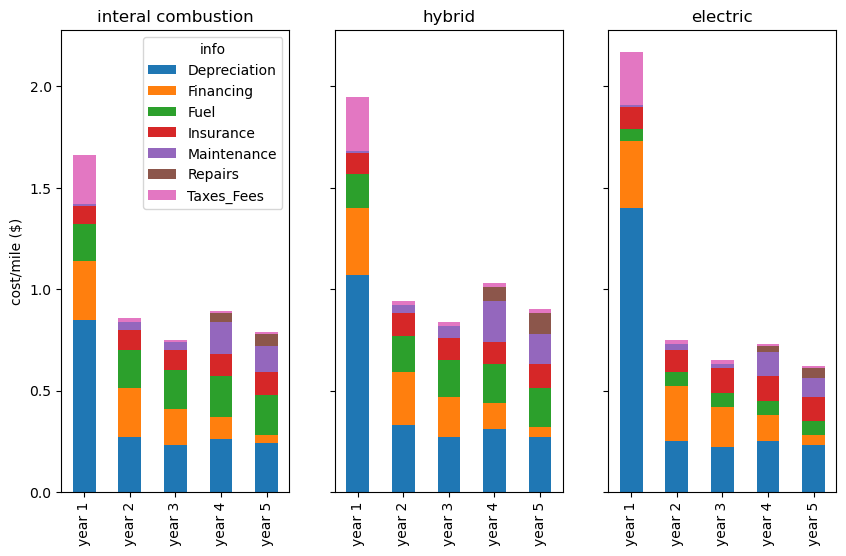

In [10]:
# creating yearly cost for internal combustion engine cars and seting index to break down cost item
ice_yearly_cost_avg=yearly_cost_avg[yearly_cost_avg['type']=='internal combustion'].set_index('info')
# deleteing type column
del ice_yearly_cost_avg['type']
# creating yearly cost for electric cars and seting index to break down cost item
ev_yearly_cost_avg=yearly_cost_avg[yearly_cost_avg['type']=='electric'].set_index('info')
# deleteing type column
del ev_yearly_cost_avg['type']
# creating yearly cost for hybrid cars and seting index to break down cost item
hybrid_yearly_cost_avg=yearly_cost_avg[yearly_cost_avg['type']=='hybrid'].set_index('info')
# deleteing type column
del hybrid_yearly_cost_avg['type']

# creating subplot
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize = (10, 6))
# transposing yearly cost/mile for internal combustion engine cars to plot verse year cost
ice_yearly_cost_avg.T.plot.bar(stacked=True,ax=axes[0], title='interal combustion',ylabel='cost/mile ($)')
# transposing yearly cost/mile for hybrid cars to plot verse year cost
hybrid_yearly_cost_avg.T.plot.bar(stacked=True,ax=axes[1], title='hybrid', legend=False)
# transposing yearly cost/mile for electric cars to plot verse year cost
ev_yearly_cost_avg.T.plot.bar(stacked=True,ax=axes[2], title='electric', legend=False)


In [11]:
# saving figure to pdf
fig.savefig("cost_per_mile.pdf")

This section calculates the yearly percentage of each break down items to see how the distribution of each item changes over time

In [12]:
# summing the itemized break down items to find the total cost of each model
sum_df=ice_hybrid_ev_df.groupby(["model","engine",'cost',"type"]).sum()
# reseting the index
sum_df.reset_index(inplace=True)
# fixing the model year which also gets summed by 7
sum_df['model year']=sum_df['model year']/7
# displaying the 1st 2 rows of the summed dataframe
sum_df.head(2)

,model,engine,cost,type,info,year 1,year 2,year 3,year 4,year 5,model year,cost/mile (year 1),cost/mile (year 2),cost/mile (year 3),cost/mile (year 4),cost/mile (year 5)
0,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,internal combustion,InsuranceMaintenanceRepairsTaxes_FeesFinancing...,25212,12465,10953,13068,11562,2023.0,1.68,0.84,0.72,0.86,0.78
1,Acura Integra 4dr Hatchback w/A-Spec and Techn...,1.5L 4cyl Turbo 6M,37996,internal combustion,InsuranceMaintenanceRepairsTaxes_FeesFinancing...,16606,8915,8028,8640,8712,2023.0,1.10,0.59,0.54,0.58,0.58


In [13]:
# add up yearly cost based on model and engine type
car_yearly_cost_df= sum_df.groupby(["model","engine",'cost']).sum()
# reseting the index
car_yearly_cost_df.reset_index(inplace=True)
# displaying the 1st 2 rows of the summed dataframe
car_yearly_cost_df.head(2)

,,,type,info,year 1,year 2,year 3,year 4,year 5,model year,cost/mile (year 1),cost/mile (year 2),cost/mile (year 3),cost/mile (year 4),cost/mile (year 5)
model,engine,cost,,,,,,,,,,,,,
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Package,2.0L 4cyl Turbo 10A,53096,internal combustion,InsuranceMaintenanceRepairsTaxes_FeesFinancing...,25212,12465,10953,13068,11562,2023.0,1.68,0.84,0.72,0.86,0.78
Acura Integra 4dr Hatchback w/A-Spec and Technology Packages,1.5L 4cyl Turbo 6M,37996,internal combustion,InsuranceMaintenanceRepairsTaxes_FeesFinancing...,16606,8915,8028,8640,8712,2023.0,1.10,0.59,0.54,0.58,0.58


In [15]:
costlist=[] 
costlist1=[]
costlist2=[]
costlist3=[]
costlist4=[]
costlist5=[]
i=0
for row, column in car_yearly_cost_df.iterrows():
#     print(row)
#     print(column[5])
    for k in range(5):
        for j in range(7):
            if k == 0:
                costlist.append((column[0],column[1],column[2],column[k+5]))
            elif k == 1:
                costlist1.append((column[2],column[k+5]))
            elif k == 2:
                costlist2.append((column[2],column[k+5]))
            elif k == 3:
                costlist3.append((column[2],column[k+5]))
            elif k == 4:
                costlist4.append((column[2],column[k+5]))
            elif k == 5:
                costlist5.append((column[2],column[k+5]))
           # print(column[k],i)
            i=i+1
#print(column)
costlist=pd.DataFrame(costlist)
costlist1=pd.DataFrame(costlist1)
costlist2=pd.DataFrame(costlist2)
costlist3=pd.DataFrame(costlist3)
costlist4=pd.DataFrame(costlist4)

In [16]:
total_cost_df=[]
total_cost_df=reduce(lambda df1,df2: pd.merge(df1,df2, left_index=True, right_index=True),[costlist,costlist1,costlist2])
total_cost_df.rename(columns={'0_x':'model','1_x': 'engine', 3: 'total year 1', '1_y': 'total year 2', 
                              1:'total year 3'},inplace=True)
total_cost_df.drop(columns=[0, 2,"0_y"],inplace=True)
total_cost_df=reduce(lambda df1,df2: pd.merge(df1,df2, left_index=True, right_index=True),[total_cost_df,costlist3,costlist4])
total_cost_df.rename(columns={ '1_x': 'total year 4', '1_y': 'total year 5', '0_y': 'cost'},inplace=True)
total_cost_df.drop(columns=["0_x"],inplace=True)
total_cost_df.head(2)

,model,engine,total year 1,total year 2,total year 3,total year 4,cost,total year 5
0,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,25212,12465,10953,13068,53096,11562
1,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,25212,12465,10953,13068,53096,11562


In [17]:
total_cost_df=total_cost_df.set_index(['model','engine','cost'])
ice_hybrid_ev_df=ice_hybrid_ev_df.set_index(['model','engine','cost','info'])

In [18]:
ice_hybrid_ev_df.head()

year 1  \
model                                              engine              cost  info                  
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096 Insurance      1544   
                                                                             Maintenance      86   
                                                                             Repairs           0   
                                                                             Taxes_Fees     3347   
                                                                             Financing      4197   

                                                                                          year 2  \
model                                              engine              cost  info                  
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096 Insurance      1598   
                                                                             Maintenance     440   
                                                                             Repairs           0   
                                                                             Taxes_Fees      239   
                                                                             Financing      3421   

                                                                                          year 3  \
model                                              engine              cost  info                  
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096 Insurance      1654   
                                                                             Maintenance     386   
                                                                             Repairs           0   
                                                                             Taxes_Fees      214   
                                                                             Financing      2566   

                                                                                          year 4  \
model                                              engine              cost  info                  
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096 Insurance      1712   
                                                                             Maintenance    2465   
                                                                             Repairs         462   
                                                                             Taxes_Fees      194   
                                                                             Financing      1628   

                                                                                          year 5  \
model                                              engine              cost  info                  
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096 Insurance      1772   
                                                                             Maintenance    2049   
                                                                             Repairs         707   
                                                                             Taxes_Fees      194   
                                                                             Financing       597   

                                                                                          model year  \
model                                              engine              cost  info                      
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096 Insurance          2023   
                                                                             Maintenance        2023   
                                                                             Repairs            2023   
                                                                 

In [19]:
total_cost_df=ice_hybrid_ev_df.merge(total_cost_df,left_index=True, right_index=True)
total_cost_df=total_cost_df.drop_duplicates()
total_cost_df.reset_index(inplace=True)
total_cost_df.head()

,model,engine,cost,info,year 1,year 2,year 3,year 4,year 5,model year,...,cost/mile (year 1),cost/mile (year 2),cost/mile (year 3),cost/mile (year 4),cost/mile (year 5),total year 1,total year 2,total year 3,total year 4,total year 5
0,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,Insurance,1544,1598,1654,1712,1772,2023,...,0.10,0.11,0.11,0.11,0.12,25212,12465,10953,13068,11562
1,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,Maintenance,86,440,386,2465,2049,2023,...,0.01,0.03,0.03,0.16,0.14,25212,12465,10953,13068,11562
2,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,Repairs,0,0,0,462,707,2023,...,0.00,0.00,0.00,0.03,0.05,25212,12465,10953,13068,11562
3,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,Taxes_Fees,3347,239,214,194,194,2023,...,0.22,0.02,0.01,0.01,0.01,25212,12465,10953,13068,11562
4,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,Financing,4197,3421,2566,1628,597,2023,...,0.28,0.23,0.17,0.11,0.04,25212,12465,10953,13068,11562


In [20]:
for i in range(5):
    text = 'year ' + str(i+1)
    total_cost_df[text+" (ratio)"]=round(total_cost_df[text]/total_cost_df["total "+ text]*100,2)
total_cost_df=total_cost_df.set_index('type')
total_cost_df.head(2)

,model,engine,cost,info,year 1,year 2,year 3,year 4,year 5,model year,...,total year 1,total year 2,total year 3,total year 4,total year 5,year 1 (ratio),year 2 (ratio),year 3 (ratio),year 4 (ratio),year 5 (ratio)
type,,,,,,,,,,,,,,,,,,,,,
internal combustion,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,Insurance,1544,1598,1654,1712,1772,2023,...,25212,12465,10953,13068,11562,6.12,12.82,15.10,13.10,15.33
internal combustion,Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance P...,2.0L 4cyl Turbo 10A,53096,Maintenance,86,440,386,2465,2049,2023,...,25212,12465,10953,13068,11562,0.34,3.53,3.52,18.86,17.72


In [21]:
total_ice_cost_plot=total_cost_df.loc["internal combustion"]
total_ice_cost_plot=total_ice_cost_plot[['info',"year 1 (ratio)","year 2 (ratio)","year 3 (ratio)","year 4 (ratio)","year 5 (ratio)"]]
total_ice_cost_plot.reset_index(inplace=True)
del total_ice_cost_plot['type']

total_hybrid_cost_plot=total_cost_df.loc["hybrid"]
total_hybrid_cost_plot=total_hybrid_cost_plot[['info',"year 1 (ratio)","year 2 (ratio)","year 3 (ratio)","year 4 (ratio)","year 5 (ratio)"]]
total_hybrid_cost_plot.reset_index(inplace=True)
del total_hybrid_cost_plot['type']

total_ev_cost_plot=total_cost_df.loc["electric"]
total_ev_cost_plot=total_ev_cost_plot[['info',"year 1 (ratio)","year 2 (ratio)","year 3 (ratio)","year 4 (ratio)","year 5 (ratio)"]]
total_ev_cost_plot.reset_index(inplace=True)
del total_ev_cost_plot['type']
total_ev_cost_plot.head(2)

,info,year 1 (ratio),year 2 (ratio),year 3 (ratio),year 4 (ratio),year 5 (ratio)
0,Insurance,3.29,11.61,14.60,12.26,16.53
1,Maintenance,0.35,4.91,3.19,22.22,13.81


In [22]:
#transpose dataframe
total_ice_cost_plot=total_ice_cost_plot.groupby('info').mean().T
total_hybrid_cost_plot=total_hybrid_cost_plot.groupby('info').mean().T
total_ev_cost_plot=total_ev_cost_plot.groupby('info').mean().T
total_ice_cost_plot.head(2)

info,Depreciation,Financing,Fuel,Insurance,Maintenance,Repairs,Taxes_Fees
year 1 (ratio),48.792222,17.025370,11.317454,5.955185,0.903657,0.0,13.923056
year 2 (ratio),30.140602,26.962176,22.376435,11.944352,4.579583,0.0,1.912407


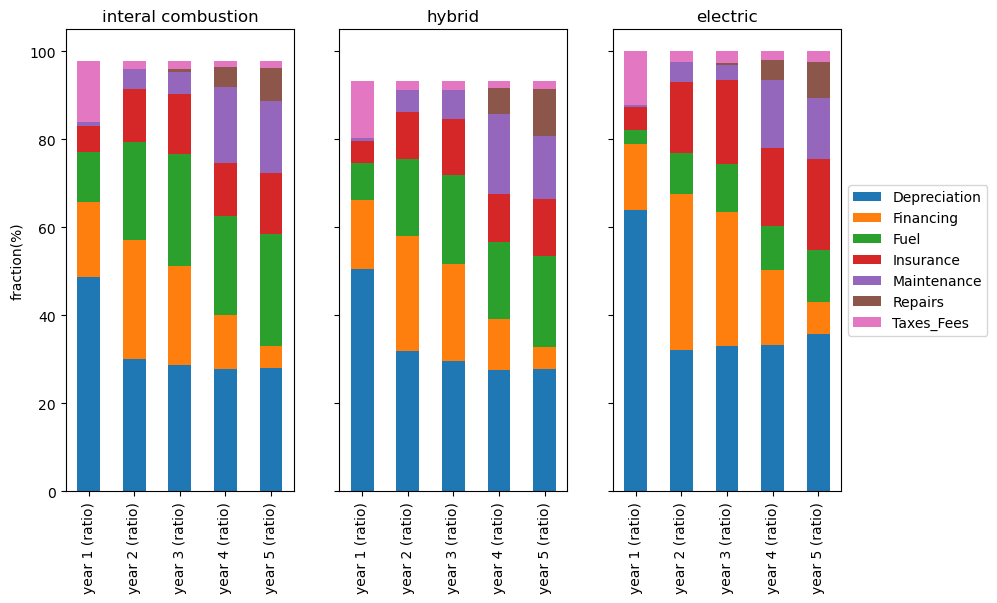

In [23]:
#plot dataframe 
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize = (10, 6))
total_ice_cost_plot.plot.bar(stacked=True,ax=axes[0], title='interal combustion',ylabel='fraction(%)',legend=False)
total_hybrid_cost_plot.plot.bar(stacked=True,ax=axes[1], title='hybrid', legend=False)
total_ev_cost_plot.plot.bar(stacked=True,ax=axes[2], title='electric').legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [24]:
sum_df.set_index('type',inplace=True)#reset_index(inplace=True)

In [25]:
#datatrame to plot yearly cost for each model based on engine type
ice_transposed = sum_df.loc['internal combustion']
ice_transposed.set_index(['model','engine'],inplace=True)
ice_transposed = ice_transposed[['year 1', 'year 2', 'year 3', 'year 4', 'year 5']].T

hybid_transposed = sum_df.loc['internal combustion']
hybid_transposed.set_index(['model','engine'],inplace=True)
hybid_transposed = hybid_transposed[['year 1', 'year 2', 'year 3', 'year 4', 'year 5']].T

ev_transposed = sum_df.loc['internal combustion']
ev_transposed.set_index(['model','engine'],inplace=True)
ev_transposed = ev_transposed[['year 1', 'year 2', 'year 3', 'year 4', 'year 5']].T
ev_transposed.head(2)

model  Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Package  \
engine                                  2.0L 4cyl Turbo 10A   
year 1                                              25212     
year 2                                              12465     

model  Acura Integra 4dr Hatchback w/A-Spec and Technology Packages  \
engine                                           1.5L 4cyl Turbo 6M   
year 1                                              16606             
year 2                                               8915             

model                      Acura Integra 4dr Hatchback w/A-SpecvPackage  \
engine 1.5L 4cyl Turbo CVT                          1.5L 4cyl Turbo CVT   
year 1               16469                                        15978   
year 2                8774                                         8369   

model  Acura Integra Hatchback 4dr Hatchback Acura MDX 4dr SUV  \
engine                   1.5L 4cyl Turbo CVT     3.5L 6cyl 10A   
year 1                                 15270             21337   
year 2                                  8113             12982   

model  Acura MDX 4dr SUV AWD Acura MDX 4dr SUV AWD w/A-Spec Package  \
engine         3.5L 6cyl 10A                          3.5L 6cyl 10A   
year 1                 24587                                  25901   
year 2                 12729                                  15251   

model  Acura MDX 4dr SUV AWD w/Advance Package  \
engine                           3.5L 6cyl 10A   
year 1                                   28518   
year 2                                   16111   

model  Acura MDX 4dr SUV AWD w/Technology Package  ...  \
engine                              3.5L 6cyl 10A  ...   
year 1                                      24812  ...   
year 2                                      14193  ...   

model  Dodge Challenger GT 2dr Coupe AWD Dodge Challenger R/T 2dr Coupe  \
engine                      3.6L 6cyl 8A                   5.7L 8cyl 6M   
year 1                             21098                          24007   
year 2                              9955                          11001   

model  Dodge Challenger R/T Scat Pack 2dr Coupe  \
engine                             6.4L 8cyl 6M   
year 1                                    28252   
year 2                                    13581   

model  Dodge Challenger R/T Scat Pack Widebody R/T Scat Pack Widebody 2dr Coupe  \
engine                                                             6.4L 8cyl 6M   
year 1                                              31482                         
year 2                                              15052                         

model  Dodge Challenger SRT Hellcat Jailbreak 2dr Coupe  \
engine                                 6.2L 8cyl S/C 8A   
year 1                                            40491   
year 2                                            17656   

model  Dodge Challenger SRT Hellcat Redeye Jailbreak 2dr Coupe w/Prod. End 04/23  \
engine                                                          6.2L 8cyl S/C 8A   
year 1                                              46568                          
year 2                                              19514                          

model  Dodge Challenger SXT 2dr Coupe Dodge Challenger SXT 2dr Coupe AWD  \
engine                   3.6L 6cyl 8A                       3.6L 6cyl 8A   
year 1                          16832                              19205   
year 2                           8354                               9311   

model  FIAT 500X Pop 4dr SUV AWD FIAT 500X Sport 4dr SUV AWD  
engine        1.3L 4cyl Turbo 9A          1.3L 4cyl Turbo 9A  
year 1                     14761                       16277  
year 2                      8078                        8528  

[2 rows x 218 columns]

In [26]:
   ice_hybrid_ev_df.head(7)

year 1  \
model                                              engine              cost  info                   
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096 Insurance       1544   
                                                                             Maintenance       86   
                                                                             Repairs            0   
                                                                             Taxes_Fees      3347   
                                                                             Financing       4197   
                                                                             Depreciation   13282   
                                                                             Fuel            2756   

                                                                                           year 2  \
model                                              engine              cost  info                   
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096 Insurance       1598   
                                                                             Maintenance      440   
                                                                             Repairs            0   
                                                                             Taxes_Fees       239   
                                                                             Financing       3421   
                                                                             Depreciation    3928   
                                                                             Fuel            2839   

                                                                                           year 3  \
model                                              engine              cost  info                   
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096 Insurance       1654   
                                                                             Maintenance      386   
                                                                             Repairs            0   
                                                                             Taxes_Fees       214   
                                                                             Financing       2566   
                                                                             Depreciation    3209   
                                                                             Fuel            2924   

                                                                                           year 4  \
model                                              engine              cost  info                   
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096 Insurance       1712   
                                                                             Maintenance     2465   
                                                                             Repairs          462   
                                                                             Taxes_Fees       194   
                                                                             Financing       1628   
                                                                             Depreciation    3595   
                                                                             Fuel            3012   

                                                                                           year 5  \
model                                              engine              cost  info                   
Acura 2023 TLX Sedan 4dr Sedan AWD w/Advance Pa... 2.0L 4cyl Turbo 10A 53096 Insurance       1772   
                                                                             Maintenance     2049   
                                               

In [27]:
#reset index to info column
ice_hybrid_ev_df.reset_index(inplace=True)
ice_hybrid_ev_df=ice_hybrid_ev_df.set_index('info')

In [28]:
Depreciation_cost_df= ice_hybrid_ev_df.loc[['Depreciation']]
#Depreciation_cost_df.reset_index(inplace=True)
Depreciation_cost_df=Depreciation_cost_df[['cost','year 1','year 2','year 3','year 4','year 5','type']]
#Depreciation_cost_df.rename(columns={'year 1': 1,'year 2': 2,'year 3': 3,'year 4': 4,'year 5': 5})
Depreciation_cost_df.set_index('type',inplace=True)

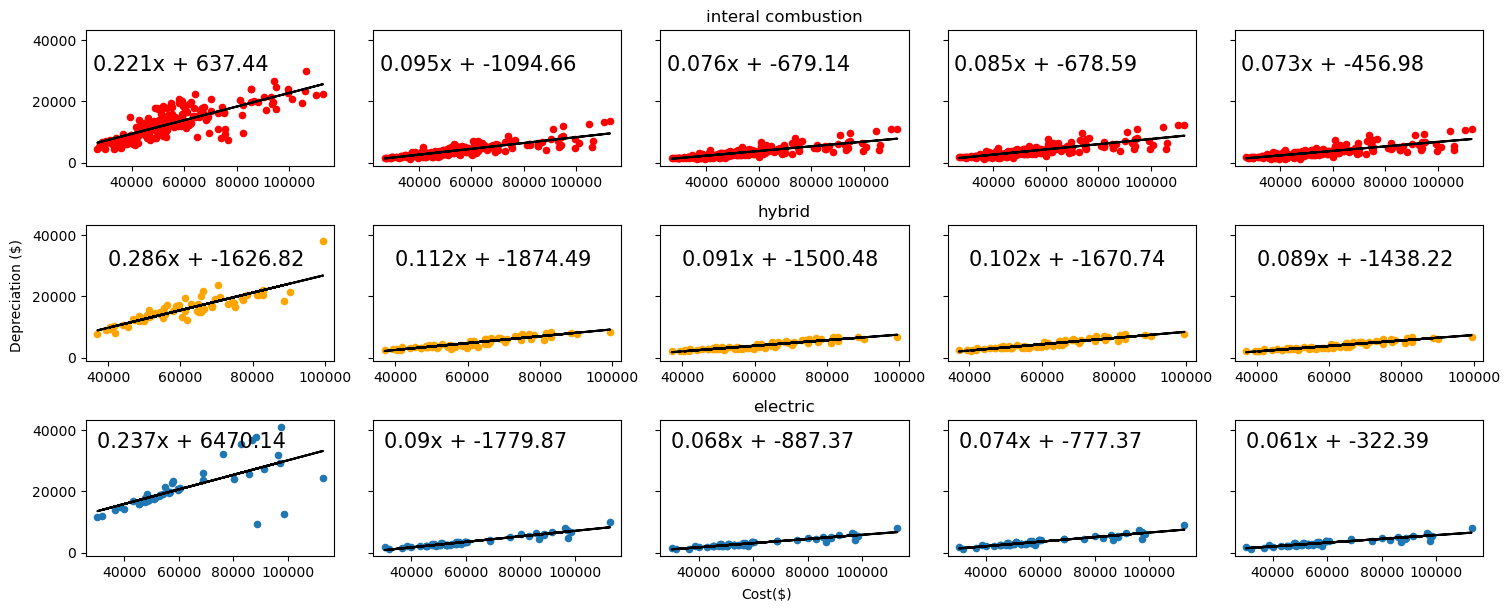

In [36]:
#create dataframe based on engine for depreciation vs cost
ice_Depreciation_cost_df=Depreciation_cost_df.loc['internal combustion']
hybrid_Depreciation_cost_df=Depreciation_cost_df.loc['hybrid']
ev_Depreciation_cost_df=Depreciation_cost_df.loc['electric']

#create figure for subplots
fig, axes= plt.subplots(nrows=3, ncols=5, sharey=True, figsize = (15, 6))

#plotting of internal combustion engines in top row, column = year
ice_Depreciation_cost_df.plot.scatter(x='cost', y='year 1',ax=axes[0,0],c='red',xlabel='',ylabel='')
ice_Depreciation_cost_df.plot.scatter(x='cost', y='year 2',ax=axes[0,1],c='red',xlabel='')
ice_Depreciation_cost_df.plot.scatter(x='cost', y='year 3',ax=axes[0,2],c='red',xlabel='',title='interal combustion')
ice_Depreciation_cost_df.plot.scatter(x='cost', y='year 4',ax=axes[0,3],c='red',xlabel='')
ice_Depreciation_cost_df.plot.scatter(x='cost', y='year 5',ax=axes[0,4],c='red',xlabel='')

#pulling out values to fit with data a linear function
x_values=ice_Depreciation_cost_df['cost']
# creating loop for the years 1-5
for i in range(5):
    # create string for year: adding 1 since year starts at 1 not zero but subplot # starts at 0
    text = 'year '+str(i+1)
    # pulling out depreciation based on year from dataframe
    y_values=ice_Depreciation_cost_df[text]
    #calculating linear regression for year
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    # formating text for fit to plot in subfigure
    line_eq = str(round(slope,3)) + "x + " + str(round(intercept,2))
    # ploting linear regression in same subplot as data being fitted
    axes[0,i].plot(x_values,regress_values,'black')
    # writing function to graph
    axes[0,i].annotate(line_eq,xy=(25000,30000),fontsize=15,color="black")

#plotting of hybrid engines in 2nd row, column = year
hybrid_Depreciation_cost_df.plot.scatter(x='cost', y='year 1',ax=axes[1,0],c='orange',xlabel='',ylabel='')
hybrid_Depreciation_cost_df.plot.scatter(x='cost', y='year 2',ax=axes[1,1],c='orange',xlabel='')
hybrid_Depreciation_cost_df.plot.scatter(x='cost', y='year 3',ax=axes[1,2],c='orange',xlabel='',title='hybrid')
hybrid_Depreciation_cost_df.plot.scatter(x='cost', y='year 4',ax=axes[1,3],c='orange',xlabel='')
hybrid_Depreciation_cost_df.plot.scatter(x='cost', y='year 5',ax=axes[1,4],c='orange',xlabel='')

#pulling out values to fit with data a linear function
x_values = hybrid_Depreciation_cost_df['cost']
# creating loop for the years 1-5
for i in range(5):
    # create string for year: adding 1 since year starts at 1 not zero but subplot # starts at 0
    text = 'year '+str(i+1)
    # pulling out depreciation based on year from dataframe
    y_values=hybrid_Depreciation_cost_df[text]
    #calculating linear regression for year
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    # formating text for fit to plot in subfigure
    line_eq = str(round(slope,3)) + "x + " + str(round(intercept,2))
    # ploting linear regression in same subplot as data being fitted
    axes[1,i].plot(x_values,regress_values,'black')
    # writing function to graph
    axes[1,i].annotate(line_eq,xy=(40000,30000),fontsize=15,color="black")

#plot of electric engines in 3rd row, column = year
ev_Depreciation_cost_df.plot.scatter(x='cost', y='year 1',ax=axes[2,0],xlabel='',ylabel='')
ev_Depreciation_cost_df.plot.scatter(x='cost', y='year 2',ax=axes[2,1],xlabel='')
ev_Depreciation_cost_df.plot.scatter(x='cost', y='year 3',ax=axes[2,2],xlabel='',title='electric')
ev_Depreciation_cost_df.plot.scatter(x='cost', y='year 4',ax=axes[2,3],xlabel='')
ev_Depreciation_cost_df.plot.scatter(x='cost', y='year 5',ax=axes[2,4],xlabel='')

#pulling out values to fit with data a linear function
x_values = ev_Depreciation_cost_df['cost']
# creating loop for the years 1-5
for i in range(5):
    # create string for year: adding 1 since year starts at 1 not zero but subplot # starts at 0
    text = 'year '+str(i+1)
    # pulling out depreciation based on year from dataframe
    y_values=ev_Depreciation_cost_df[text]
    #calculating linear regression for year
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    # formating text for fit to plot in subfigure
    line_eq = str(round(slope,3)) + "x + " + str(round(intercept,2))
    # ploting linear regression in same subplot as data being fitted
    axes[2,i].plot(x_values,regress_values,'black')
    # writing function to graph
    axes[2,i].annotate(line_eq,xy=(30000,34000),fontsize=15,color="black")
fig.text(0.5,0.0, "Cost($)", ha="center", va="center")
fig.text(0.0,0.5, 'Depreciation ($)', ha="center", va="center", rotation=90)
fig.tight_layout()
plt.show()

In [37]:
#saving plot to file
fig.savefig("depreciation.pdf")

In [39]:
display('internal combustion engine cars correlation matrix')
display(ice_Depreciation_cost_df[["cost", "year 1","year 2", "year 3","year 4",'year 5']].corr())
display('hybrid cars correlation matrix')
display(hybrid_Depreciation_cost_df[["cost", "year 1","year 2", "year 3","year 4",'year 5']].corr())
display('electric cars correlation matrix')
display(ev_Depreciation_cost_df[["cost", "year 1","year 2", "year 3","year 4",'year 5']].corr())

'internal combustion engine cars correlation matrix'

,cost,year 1,year 2,year 3,year 4,year 5
cost,1.000000,0.806244,0.840552,0.823667,0.814575,0.793311
year 1,0.806244,1.000000,0.551016,0.508717,0.492287,0.459172
year 2,0.840552,0.551016,1.000000,0.990977,0.983876,0.965301
year 3,0.823667,0.508717,0.990977,1.000000,0.998970,0.991591
year 4,0.814575,0.492287,0.983876,0.998970,1.000000,0.996441
year 5,0.793311,0.459172,0.965301,0.991591,0.996441,1.000000


'hybrid cars correlation matrix'

,cost,year 1,year 2,year 3,year 4,year 5
cost,1.000000,0.863382,0.917748,0.927684,0.930356,0.934111
year 1,0.863382,1.000000,0.698156,0.710701,0.714425,0.720632
year 2,0.917748,0.698156,1.000000,0.998053,0.996483,0.992201
year 3,0.927684,0.710701,0.998053,1.000000,0.999769,0.998043
year 4,0.930356,0.714425,0.996483,0.999769,1.000000,0.999156
year 5,0.934111,0.720632,0.992201,0.998043,0.999156,1.000000


'electric cars correlation matrix'

,cost,year 1,year 2,year 3,year 4,year 5
cost,1.000000,0.678602,0.950045,0.938739,0.931680,0.913521
year 1,0.678602,1.000000,0.550929,0.531641,0.522805,0.503046
year 2,0.950045,0.550929,1.000000,0.994218,0.989115,0.974380
year 3,0.938739,0.531641,0.994218,1.000000,0.999196,0.992897
year 4,0.931680,0.522805,0.989115,0.999196,1.000000,0.996868
year 5,0.913521,0.503046,0.974380,0.992897,0.996868,1.000000
